# Importing libraries 

In [1]:
# Data Manipulation
import numpy as np 
import pandas as pd

# Date 
from datetime import datetime, timedelta

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import networkx as nx

In [2]:
#!pip install networkx

# Loading data

In [3]:
plane_data = pd.read_csv("C:/Users/ayush/OneDrive/Desktop/Northeastern Sem 4 (Fall 2023)/DSCMT Hong Pan/Project/German Air Fares.csv")

In [4]:
plane_data.head()

,departure_city,arrival_city,scrape_date,departure_date,departure_date_distance,departure_time,arrival_time,airline,stops,price (€)
0,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:30am,7:45am,Eurowings,direct,74.00
1,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:40am,7:55am,easyJet,direct,75.00
2,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:45am,8:00am,easyJet,direct,80.00
3,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:15am,7:30am,Eurowings,direct,84.00
4,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:55am,8:10am,Eurowings,direct,84.00


In [5]:
plane_data.tail()

,departure_city,arrival_city,scrape_date,departure_date,departure_date_distance,departure_time,arrival_time,airline,stops,price (€)
62622,STR Stuttgart,HAJ Hannover,24.10.2019,24.04.2020,6 months,10:30 Uhr,11:40 Uhr,Eurowings,direct,102.00
62623,STR Stuttgart,HAJ Hannover,24.10.2019,24.04.2020,6 months,07:00 Uhr,08:05 Uhr,Eurowings,direct,192.00
62624,STR Stuttgart,LEJ Leipzig/Halle,24.10.2019,24.04.2020,6 months,15:05 Uhr,16:10 Uhr,Eurowings,direct,72.00
62625,STR Stuttgart,LEJ Leipzig/Halle,24.10.2019,24.04.2020,6 months,06:15 Uhr,07:25 Uhr,Eurowings,direct,72.00
62626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13499686.00


In [6]:
plane_data.shape

(62627, 10)

## About the dataset:
The dataset is comprised of 62,627 entries spread across 10 columns.

The columns in the dataset include:
- **departure_city**: The city from which the flight departs.
- **arrival_city**: The city to which the flight arrives.
- **scrape_date**: The date when flight price information was retrieved.
- **departure_date**: The departure date of the flight (25-10-2019 to 24-04-2020).
- **departure_date_distance**: How far in advance (e.g., "1 week") the flight was booked.
- **departure_time**: The departure time of the flight.
- **arrival_time**: The arrival time of the flight.
- **airline**: The airline that operates the flight.
- **stops**: The number of layovers or stops during the flight.
- **price (€)**: The price of the flight ticket in Euros.

In [7]:
plane_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62627 entries, 0 to 62626
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   departure_city           62626 non-null  object
 1   arrival_city             62626 non-null  object
 2   scrape_date              62626 non-null  object
 3   departure_date           62626 non-null  object
 4   departure_date_distance  62626 non-null  object
 5   departure_time           62626 non-null  object
 6   arrival_time             62626 non-null  object
 7   airline                  62626 non-null  object
 8   stops                    62626 non-null  object
 9   price (€)                62627 non-null  object
dtypes: object(10)
memory usage: 4.8+ MB


# Data Transformation:
Converting the columns to the appropriate format

In [8]:
# Changing date to datetime 
plane_data['scrape_date'] = pd.to_datetime(plane_data['scrape_date'], format='%d.%m.%Y')
plane_data['departure_date'] = pd.to_datetime(plane_data['departure_date'], format='%d.%m.%Y')
plane_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62627 entries, 0 to 62626
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   departure_city           62626 non-null  object        
 1   arrival_city             62626 non-null  object        
 2   scrape_date              62626 non-null  datetime64[ns]
 3   departure_date           62626 non-null  datetime64[ns]
 4   departure_date_distance  62626 non-null  object        
 5   departure_time           62626 non-null  object        
 6   arrival_time             62626 non-null  object        
 7   airline                  62626 non-null  object        
 8   stops                    62626 non-null  object        
 9   price (€)                62627 non-null  object        
dtypes: datetime64[ns](2), object(8)
memory usage: 4.8+ MB


In [9]:
# Converting price to a float and removing commas 
plane_data['price (€)'] = plane_data['price (€)'].str.replace(',', '').astype(float)
plane_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62627 entries, 0 to 62626
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   departure_city           62626 non-null  object        
 1   arrival_city             62626 non-null  object        
 2   scrape_date              62626 non-null  datetime64[ns]
 3   departure_date           62626 non-null  datetime64[ns]
 4   departure_date_distance  62626 non-null  object        
 5   departure_time           62626 non-null  object        
 6   arrival_time             62626 non-null  object        
 7   airline                  62626 non-null  object        
 8   stops                    62626 non-null  object        
 9   price (€)                62627 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 4.8+ MB


# Data Cleaning:
Identifying missing values and removing them 

In [10]:
# Checking for missing values 
plane_data.isnull().mean()*100

departure_city             0.001597
arrival_city               0.001597
scrape_date                0.001597
departure_date             0.001597
departure_date_distance    0.001597
departure_time             0.001597
arrival_time               0.001597
airline                    0.001597
stops                      0.001597
price (€)                  0.000000
dtype: float64

In [11]:
# It looks like only the last entry has missing values
plane_data = plane_data.iloc[:-1]
plane_data.isnull().mean()*100

departure_city             0.0
arrival_city               0.0
scrape_date                0.0
departure_date             0.0
departure_date_distance    0.0
departure_time             0.0
arrival_time               0.0
airline                    0.0
stops                      0.0
price (€)                  0.0
dtype: float64

The assumption that only the last entry contained missing values was correct, now the dataset is free from missing values  

## Standardizing the flight times to a 24-Hour format 

In [12]:
# Checking the suffixes of 'departure_time'
plane_data['departure_time'].unique()

array(['6:30am', '6:40am', '6:45am', '6:15am', '6:55am', '8:00am',
       '8:05am', '9:25pm', '8:40pm', '8:20am', '8:55am', '6:25pm',
       '7:05pm', '10:05am', '8:10am', '5:25pm', '5:30pm', '6:55pm',
       '11:15am', '1:35pm', '1:05pm', '4:35pm', '12:50pm', '8:10pm',
       '12:35pm', '1:45pm', '3:15pm', '11:40am', '2:20pm', '3:35pm',
       '6:00pm', '7:10pm', '4:20pm', '8:45pm', '12:55pm', '7:15am',
       '8:15am', '8:45am', '8:15pm', '9:45am', '10:45am', '6:40pm',
       '7:45am', '12:45pm', '5:10pm', '10:15am', '7:45pm', '11:45am',
       '7:15pm', '6:45pm', '2:45pm', '3:45pm', '4:45pm', '5:45pm',
       '6:15pm', '7:00am', '12:40pm', '2:55pm', '10:35am', '7:30am',
       '11:00am', '9:00pm', '6:30pm', '11:30am', '8:30am', '4:40pm',
       '5:40pm', '10:20am', '1:00pm', '10:00am', '9:00am', '5:55pm',
       '2:00pm', '4:00pm', '5:00pm', '12:00pm', '12:05pm', '6:00am',
       '10:50am', '8:35pm', '3:40pm', '9:25am', '12:15pm', '2:30pm',
       '7:35pm', '8:50pm', '8:50am', '6:20

* Most times are in the format with "am" or "pm" suffixes (e.g., '6:30am', '9:25pm').
* Some times are in the 24-hour format with the "Uhr" suffix (e.g., '14:50 Uhr'). "Uhr" is German for "o'clock."
* I will convert all times to a 24-Hour format, to have a consistent format or for further analysis.

In [13]:
# Time to AM- and PM- format  
def convert_to_am_pm(time_str):
    if 'Uhr' in time_str:
        # Remove 'Uhr' from the string and strip whitespaces
        time_str = time_str.replace('Uhr', '').strip()

        # Convert the string to a datetime object
        time_obj = pd.to_datetime(time_str, format='%H:%M')

        # Convert the datetime object to the desired format
        return time_obj.strftime('%I:%M%p').lower()
    else:
        return time_str  # Return the original string if it doesn't contain "Uhr"

# Apply the revised conversion function to 'departure_time' and 'arrival_time' columns
plane_data['departure_time_24h'] = plane_data['departure_time'].apply(convert_to_am_pm)
plane_data['arrival_time_24h'] = plane_data['arrival_time'].apply(convert_to_am_pm)

# Display the rows that previously contained 'Uhr' to confirm the conversion
plane_data[['departure_time', 'departure_time_24h', 'arrival_time', 'arrival_time_24h']].tail()

,departure_time,departure_time_24h,arrival_time,arrival_time_24h
62621,15:05 Uhr,03:05pm,16:05 Uhr,04:05pm
62622,10:30 Uhr,10:30am,11:40 Uhr,11:40am
62623,07:00 Uhr,07:00am,08:05 Uhr,08:05am
62624,15:05 Uhr,03:05pm,16:10 Uhr,04:10pm
62625,06:15 Uhr,06:15am,07:25 Uhr,07:25am


In [14]:
# Time to 24 Hours Format 
def convert_to_24h_format(time_str):
    # Convert the string to a datetime object
    time_obj = pd.to_datetime(time_str, format='%I:%M%p')
    
    # Convert the datetime object to 24-hour format
    return time_obj.strftime('%H:%M')

# Convert the 'am/pm' columns to 24-hour format and store in new columns
plane_data['departure_time_24h'] = plane_data['departure_time_24h'].apply(convert_to_24h_format)
plane_data['arrival_time_24h'] = plane_data['arrival_time_24h'].apply(convert_to_24h_format)
plane_data[['departure_time', 'departure_time_24h', 'arrival_time', 'arrival_time_24h']].tail()

,departure_time,departure_time_24h,arrival_time,arrival_time_24h
62621,15:05 Uhr,15:05,16:05 Uhr,16:05
62622,10:30 Uhr,10:30,11:40 Uhr,11:40
62623,07:00 Uhr,07:00,08:05 Uhr,08:05
62624,15:05 Uhr,15:05,16:10 Uhr,16:10
62625,06:15 Uhr,06:15,07:25 Uhr,07:25


## Creating a new column for the flight duration

In [15]:
# Convert the 'departure_time_24h' and 'arrival_time_24h' columns to datetime format
plane_data['departure_time_24h'] = pd.to_datetime(plane_data['departure_time_24h'], format='%H:%M')
plane_data['arrival_time_24h'] = pd.to_datetime(plane_data['arrival_time_24h'], format='%H:%M')

# Calculate the time difference
plane_data['flight_duration'] = (plane_data['arrival_time_24h'] - plane_data['departure_time_24h']).dt.total_seconds() / 3600  # Convert seconds to hours

# Adjust cross midnight flights
plane_data['flight_duration'] = plane_data.apply(lambda row: row['flight_duration'] if row['departure_time_24h'] <= row['arrival_time_24h'] 
                          else row['flight_duration'] + 24, axis=1)

# Convert 'departure_time_24h' and 'arrival_time_24h' back to string format without date
plane_data['departure_time_24h'] = plane_data['departure_time_24h'].dt.strftime('%H:%M')
plane_data['arrival_time_24h'] = plane_data['arrival_time_24h'].dt.strftime('%H:%M')

plane_data.tail()

,departure_city,arrival_city,scrape_date,departure_date,departure_date_distance,departure_time,arrival_time,airline,stops,price (€),departure_time_24h,arrival_time_24h,flight_duration
62621,STR Stuttgart,HAJ Hannover,2019-10-24,2020-04-24,6 months,15:05 Uhr,16:05 Uhr,Eurowings,direct,52.0,15:05,16:05,1.000000
62622,STR Stuttgart,HAJ Hannover,2019-10-24,2020-04-24,6 months,10:30 Uhr,11:40 Uhr,Eurowings,direct,102.0,10:30,11:40,1.166667
62623,STR Stuttgart,HAJ Hannover,2019-10-24,2020-04-24,6 months,07:00 Uhr,08:05 Uhr,Eurowings,direct,192.0,07:00,08:05,1.083333
62624,STR Stuttgart,LEJ Leipzig/Halle,2019-10-24,2020-04-24,6 months,15:05 Uhr,16:10 Uhr,Eurowings,direct,72.0,15:05,16:10,1.083333
62625,STR Stuttgart,LEJ Leipzig/Halle,2019-10-24,2020-04-24,6 months,06:15 Uhr,07:25 Uhr,Eurowings,direct,72.0,06:15,07:25,1.166667


In [16]:
plane_data.describe()

,scrape_date,departure_date,price (€),flight_duration
count,62626,62626,62626.000000,62626.000000
mean,2019-10-21 10:34:12.642672128,2019-12-27 10:08:15.053172736,215.560406,5.007285
min,2019-10-18 00:00:00,2019-10-25 00:00:00,26.000000,0.000000
25%,2019-10-20 00:00:00,2019-11-06 00:00:00,100.000000,1.166667
50%,2019-10-22 00:00:00,2019-12-01 00:00:00,164.000000,3.083333
75%,2019-10-24 00:00:00,2020-01-24 00:00:00,333.000000,7.666667
max,2019-10-24 00:00:00,2020-04-24 00:00:00,3088.000000,23.916667
std,NaN,NaN,174.388935,4.929211


Minimum duration: 0 hours seems unusual,but for now I will ignore it 

## Extending column transformations

In [17]:
# Checking unique Values of 'departure_date_distance'
plane_data['departure_date_distance'].unique()

array(['1 week', '2 week', '1 month', '3 month', '6 weeks', '6 months',
       '2 weeks'], dtype=object)

Transforming the departure date distance to days, to have it standardized 

In [18]:
# Create a dictionary for the replacements
replacements = {
    '1 week': 7,
    '2 week': 14,
    '2 weeks': 14,
    '1 month': 30,
    '3 month': 90,
    '6 weeks': 42,
    '6 months': 180
}

# Replace the values
plane_data['departure_date_distance'] = plane_data['departure_date_distance'].replace(replacements)
plane_data = plane_data.rename(columns={'departure_date_distance': 'booking_period_in_days'})
plane_data.head()

,departure_city,arrival_city,scrape_date,departure_date,booking_period_in_days,departure_time,arrival_time,airline,stops,price (€),departure_time_24h,arrival_time_24h,flight_duration
0,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,7,6:30am,7:45am,Eurowings,direct,74.0,06:30,07:45,1.25
1,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,7,6:40am,7:55am,easyJet,direct,75.0,06:40,07:55,1.25
2,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,7,6:45am,8:00am,easyJet,direct,80.0,06:45,08:00,1.25
3,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,7,6:15am,7:30am,Eurowings,direct,84.0,06:15,07:30,1.25
4,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,7,6:55am,8:10am,Eurowings,direct,84.0,06:55,08:10,1.25


In [19]:
# Checking unique Values of 'airline'
plane_data['airline'].unique()

array(['Eurowings', 'easyJet', 'Lufthansa', 'Air France',
       'LOT-Polish Airlines', 'KLM', 'Swiss International Air Lines',
       'Multiple Airlines', 'Austrian Airlines', 'Luxair',
       'British Airways', 'SAS', 'Flybe', 'Alitalia',
       'Mehrere Fluglinien'], dtype=object)

* There are no spelling errors
* "Mehrere Fluglinien" is German for "Multiple Airlines"

In [20]:
# Checking unique Values of 'stops'
plane_data['stops'].unique()

array(['direct', '(1 stop)', '(1 Stopp)', '(2 Stopps)'], dtype=object)

There's a mix of English and German terms, I will standardize the entries

In [21]:
# Create a dictionary for the replacements
stop_replacements = {
    'direct': 0,
    '(1 stop)': 1, 
    '(1 Stopp)': 1, 
    '(2 Stopps)': 2, 
}

# Replace the values
plane_data['stops'] = plane_data['stops'].replace(stop_replacements)
plane_data['stops'].describe()

count    62626.000000
mean         0.597515
std          0.608719
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: stops, dtype: float64

# Dates and Flight Duration

In [22]:
# Get the minimum and maximum dates 'departure_date'

min_date = plane_data['departure_date'].min().strftime('%d.%m.%Y')
max_date = plane_data['departure_date'].max().strftime('%d.%m.%Y')

print(f'The dataset spans dates from {min_date} to {max_date}.')

The dataset spans dates from 25.10.2019 to 24.04.2020.


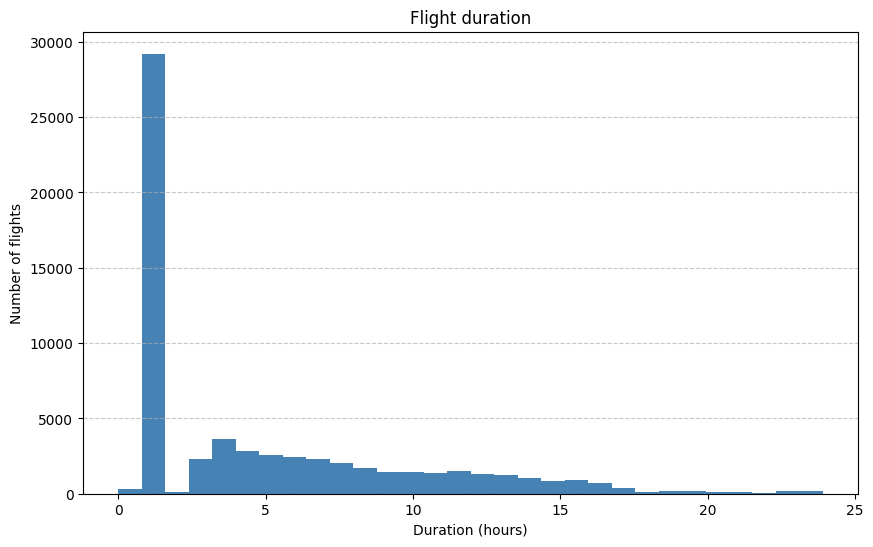

In [23]:
# Plotting the histogram for flight_duration

plt.figure(figsize=(10,6))
plt.hist(plane_data['flight_duration'], 
         bins=30, 
         color= 'steelblue') 
        
plt.title('Flight duration')
plt.xlabel('Duration (hours)')
plt.ylabel('Number of flights')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* Most flights have a short duration, clustering around 1-3 hours.
* Fewer flights have very long durations.
* The distribution tailing off as the duration increases.

In [24]:
# Checking the flights under 1 hour
short_flights = plane_data[plane_data['flight_duration'] < 1]
short_flights['flight_duration'].describe()

count    2566.000000
mean        0.851747
std         0.153630
min         0.000000
25%         0.833333
50%         0.916667
75%         0.916667
max         0.916667
Name: flight_duration, dtype: float64

* There are 2,566 flights under 1 hour.
* The mean duration is about 51 minutes 
* Some entries seems to be wrong, since there are flights wiht 0 hour duration

# Prices and Flights

## Prices and Datetime

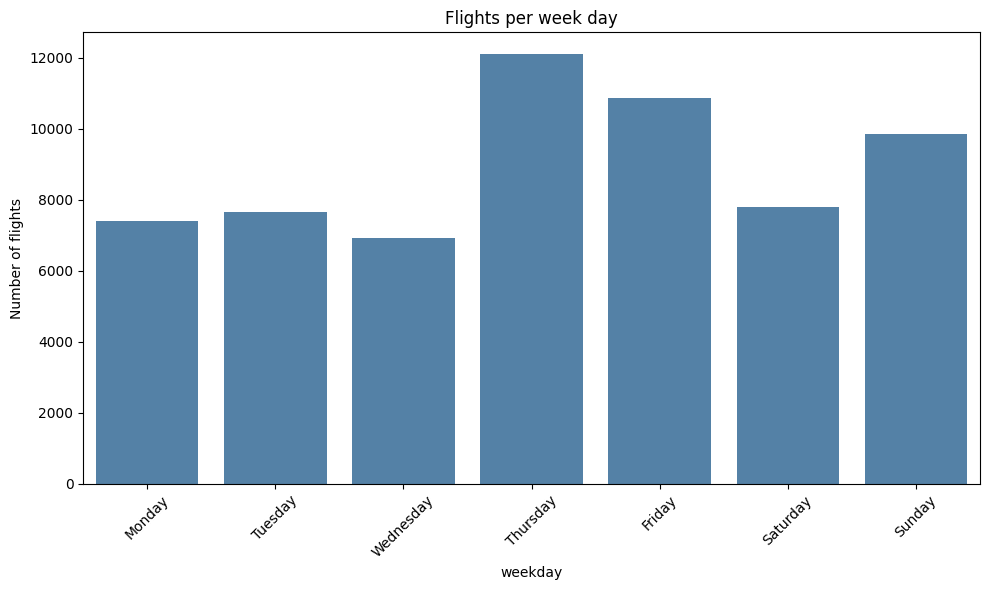

In [25]:
# Which day has the most flights 
# Extracting the day of the week from the departure_date column
plane_data['weekday'] = plane_data['departure_date'].dt.day_name()

# Counting the number of flights per weekday
flights_per_weekday = plane_data['weekday'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plotting the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=flights_per_weekday.index, y=flights_per_weekday.values, color='steelblue')
plt.title('Flights per week day')
plt.ylabel('Number of flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Thursday has the highest number of flights.
* Wednesday has the fewest flights.

In [26]:
# Calculating the mean price for each day of the week
mean_price_per_weekday = plane_data.groupby('weekday')['price (€)'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
mean_price_per_weekday.round(2)

weekday
Monday       175.54
Tuesday      183.66
Wednesday    170.05
Thursday     235.30
Friday       220.05
Saturday     233.50
Sunday       258.94
Name: price (€), dtype: float64

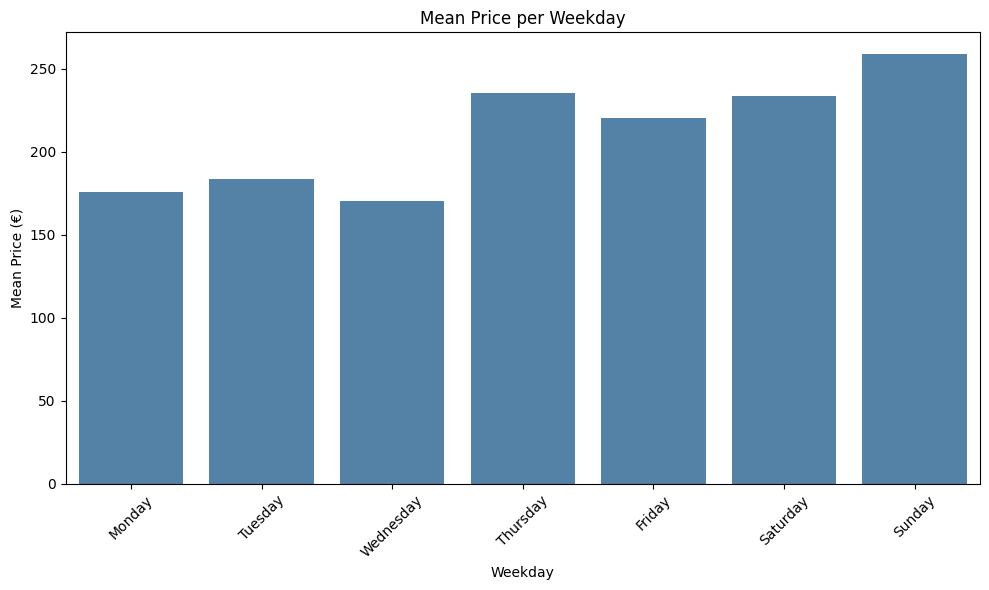

In [27]:
# Plotting the bar chart for mean price per weekday
plt.figure(figsize=(10,6))
sns.barplot(x=mean_price_per_weekday.index, y=mean_price_per_weekday.values, color='steelblue')
plt.title('Mean Price per Weekday')
plt.ylabel('Mean Price (€)')
plt.xlabel('Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Sunday has the highest average price for flights. 
* Monday has the lowest average price.
* Thursday-to-Sunday trips are the most expensive
* By postponing your trip by just 1 day and making it a Friday-Monday trip, you can save €98 on average.

In [28]:
# Extracting the hour from the departure_time_24h column
plane_data['departure_hour'] = plane_data['departure_time_24h'].str.split(':').str[0].astype(int)

# Calculating the average price for each hour
average_price_per_hour = plane_data.groupby('departure_hour')['price (€)'].mean()
average_price_per_hour.round(2)

departure_hour
1     765.75
5     315.04
6     218.86
7     287.95
8     202.10
9     203.52
10    232.56
11    247.90
12    175.87
13    212.31
14    239.43
15    167.90
16    191.26
17    195.58
18    250.56
19    199.51
20    184.79
21    168.48
22    156.75
Name: price (€), dtype: float64

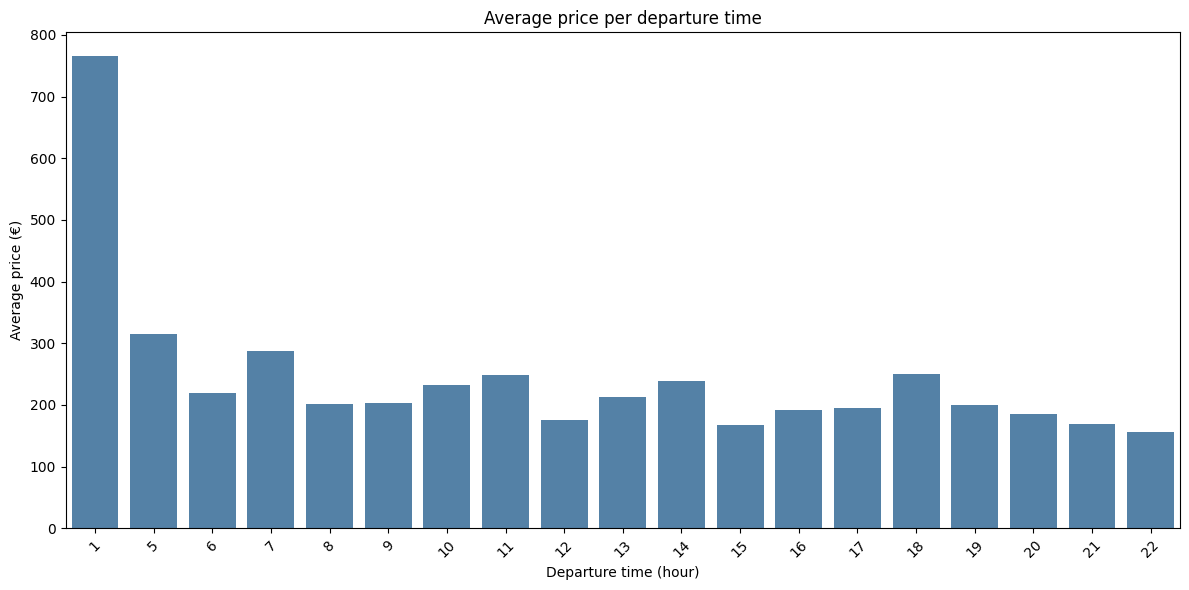

In [29]:
# Plotting the bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=average_price_per_hour.index, y=average_price_per_hour.values, color='steelblue')
plt.title('Average price per departure time')
plt.xlabel('Departure time (hour)')
plt.ylabel('Average price (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* The cheapest flights, on average, depart at 22:00.
* Flights departing at 01:00 have a significantly higher average price compared to other hours.
* Flights in the early morning (around 05:00) and late evening (around 18:00) also tend to have higher average prices.

Let's review the flights departing between 1:00 and 3:00.

In [30]:
# Filtering the flights with departure times between 1:00 and 2:59
flights_1_to_2 = plane_data[(plane_data['departure_hour'] == 1)]
flights_1_to_2

,departure_city,arrival_city,scrape_date,departure_date,booking_period_in_days,departure_time,arrival_time,airline,stops,price (€),departure_time_24h,arrival_time_24h,flight_duration,weekday,departure_hour
21089,MUC München,FMO Münster/Osnabrück,2019-10-20,2019-12-01,42,01:50 Uhr,10:00 Uhr,Lufthansa,1,764.0,01:50,10:00,8.166667,Sunday,1
21090,MUC München,FMO Münster/Osnabrück,2019-10-20,2019-12-01,42,01:50 Uhr,14:05 Uhr,Lufthansa,1,764.0,01:50,14:05,12.250000,Sunday,1
21091,MUC München,FMO Münster/Osnabrück,2019-10-20,2019-12-01,42,01:50 Uhr,18:20 Uhr,Lufthansa,1,764.0,01:50,18:20,16.500000,Sunday,1
21092,MUC München,FMO Münster/Osnabrück,2019-10-20,2019-12-01,42,01:50 Uhr,21:50 Uhr,Lufthansa,1,771.0,01:50,21:50,20.000000,Sunday,1


* The flight route is MUC München - FMO Münster/Osnabrück.
* These flights are responsible for the price spike.

## Departure and Arrival Airports

In [31]:
# Checking the unique values in the 'departure_city' and 'arrival_city' columns
plane_data['departure_city'].unique()

array(['TXL Berlin-Tegel     ', 'BRE Bremen           ',
       'DTM Dortmund         ', 'DRS Dresden          ',
       'DUS Düsseldorf       ', 'FRA Frankfurt/Main   ',
       'FDH Friedrichshafen  ', 'HAM Hamburg          ',
       'HAJ Hannover         ', 'FKB Karlsruhe/Baden-B',
       'CGN Köln/Bonn        ', 'LEJ Leipzig/Halle    ',
       'MUC München          ', 'FMO Münster/Osnabrück',
       'NUE Nürnberg         ', 'PAD Paderborn/Lippsta',
       'RLG Rostock-Laage    ', 'SCN Saarbrücken      ',
       'STR Stuttgart        '], dtype=object)

In [32]:
plane_data['arrival_city'].unique()

array(['DUS Düsseldorf       ', 'FRA Frankfurt/Main   ',
       'FDH Friedrichshafen  ', 'FKB Karlsruhe/Baden-B',
       'CGN Köln/Bonn        ', 'MUC München          ',
       'NUE Nürnberg         ', 'SCN Saarbrücken      ',
       'STR Stuttgart        ', 'TXL Berlin-Tegel     ',
       'DRS Dresden          ', 'HAM Hamburg          ',
       'LEJ Leipzig/Halle    ', 'BRE Bremen           ',
       'HAJ Hannover         ', 'FMO Münster/Osnabrück',
       'PAD Paderborn/Lippsta', 'RLG Rostock-Laage    ',
       'DTM Dortmund         '], dtype=object)

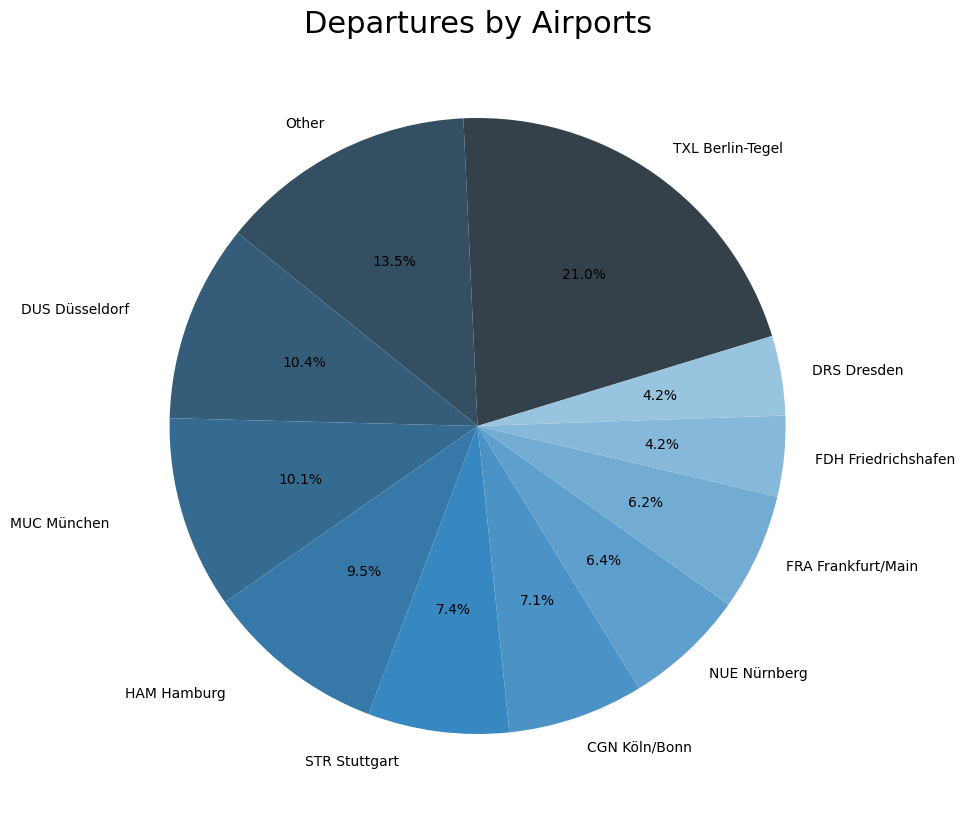

In [33]:
# Departure City analysis 
departure_count = plane_data['departure_city'].value_counts()

# Top 10 arrival cites
top_departure_cities = departure_count.head(10)

# Summery of the other 
other_departure = pd.Series(departure_count[10:].sum(), index=['Other'])

# Arrivals combined 
combined_departure = pd.concat([top_departure_cities, other_departure])
combined_departure = combined_departure.sort_values(ascending=False)

# Pie Chart
plt.figure(figsize=(10, 10))
plt.pie(
    combined_departure.values, 
    labels=combined_departure.index, 
    autopct='%1.1f%%', 
    startangle=17, 
    colors= sns.color_palette('Blues_r_d', len(combined_departure))
)
plt.title('Departures by Airports', fontsize=22)
plt.show()

* TXL Berlin-Tegel has the highest share of departures with 21.0% 
* Other major departure airports include DUS Düsseldorf, MUC München and HAM Hamburg.
* All the remaining airports combined are represented by the "Other" category,

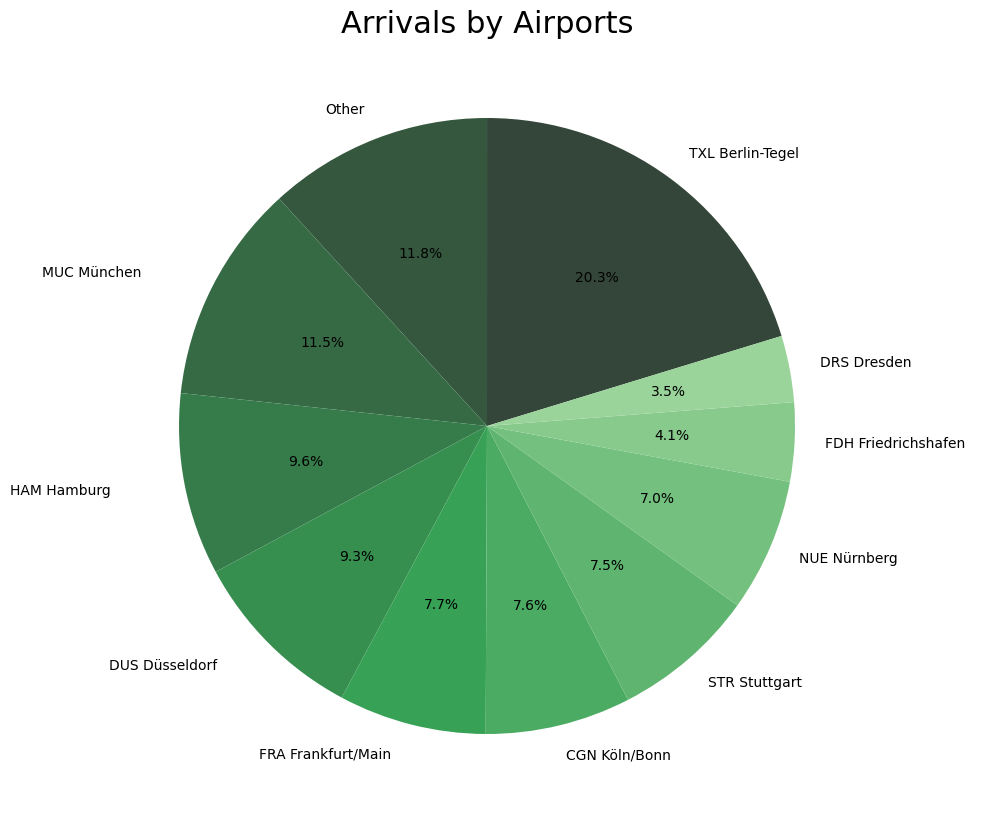

In [34]:
# Arrival City analysis 
arrival_count = plane_data['arrival_city'].value_counts()

# Top 10 arrival cites
top_arrival_cities = arrival_count.head(10)

# Summery of the other 
other_arrival = pd.Series(arrival_count[10:].sum(), index=['Other'])

# Arrivals combined 
combined_arrivals = pd.concat([top_arrival_cities, other_arrival])
combined_arrivals = combined_arrivals.sort_values(ascending=False)

# Pie Chart
plt.figure(figsize=(10, 10))
plt.pie(
    combined_arrivals.values,  
    labels=combined_arrivals.index, 
    autopct='%1.1f%%', 
    startangle=17, 
    colors= sns.color_palette('Greens_r_d', len(combined_arrivals))
)
    
plt.title('Arrivals by Airports', fontsize=22)
plt.show()

* The departures and arrival airports have nearly equal proportion of flights.

### Visualizing the top 10 departure and arrival airports:
* The bars on the right (in blue) represent the number of departures from each airport.
* The bars on the left (in green) represent the number of arrivals at each airport.

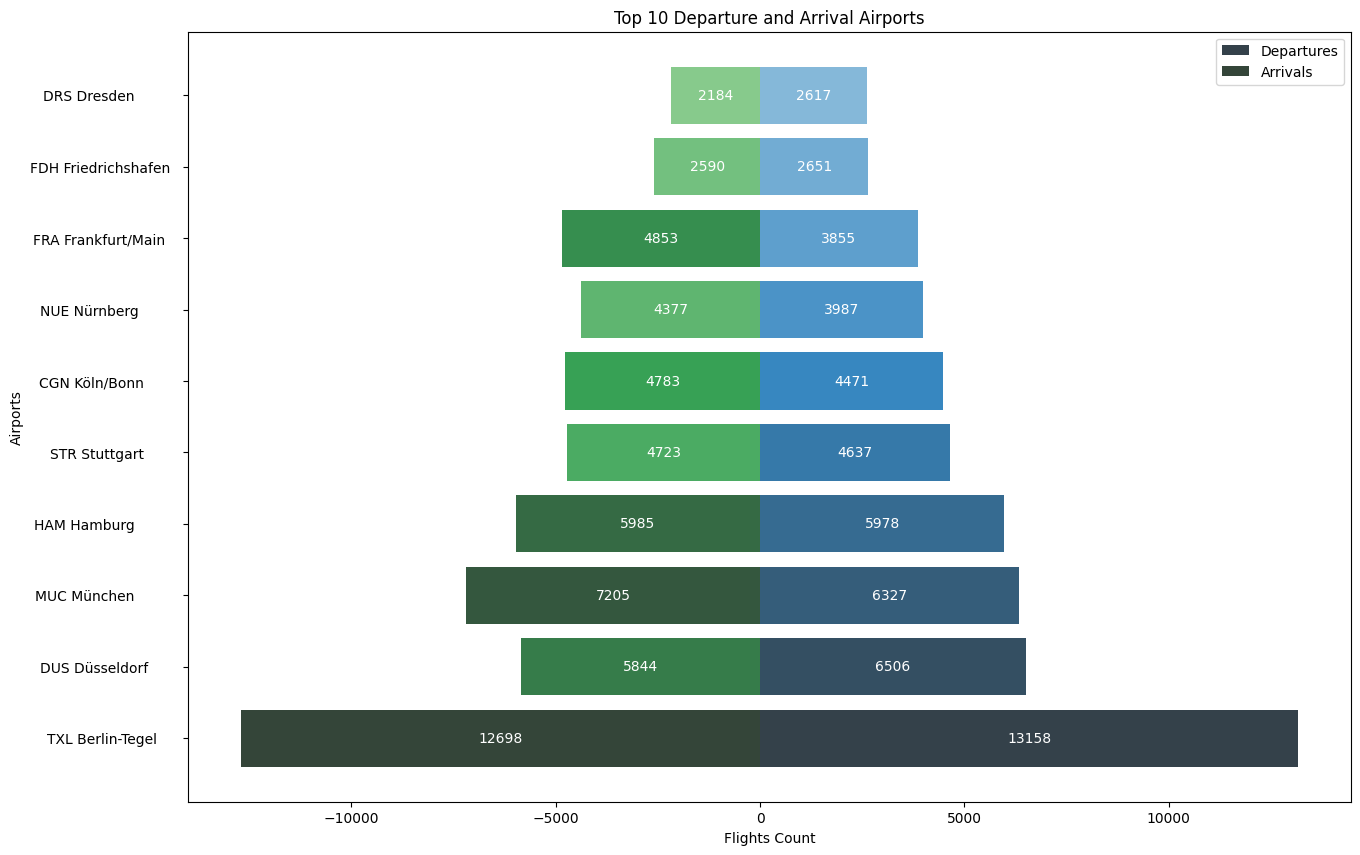

In [35]:
# Bidirectional Bar Chart for top 10 departure and arrival airports

# Set the style and size for the plots
plt.figure(figsize=(15, 10))

# bidirectional bar
bar_departure = plt.barh(
    top_departure_cities.index, 
    top_departure_cities.values, 
    color= sns.color_palette('Blues_r_d', len(combined_arrivals)), 
    label='Departures')

bar_arrival = plt.barh(
    top_arrival_cities.index, 
    -top_arrival_cities.values, 
    color= sns.color_palette('Greens_r_d', len(combined_arrivals)), 
    label='Arrivals')

# Function to add annotations to the bars
def add_center_annotations(bars):
    for bar in bars:
        width = bar.get_width()
        plt.text(width/2, bar.get_y() + bar.get_height()/2, '%d' % int(abs(width)),
                 ha='center', va='center', color='white', fontsize=10)

# Add annotations to the bars
add_center_annotations(bar_departure)
add_center_annotations(bar_arrival)

# Add title, labels, and legend
plt.title('Top 10 Departure and Arrival Airports')
plt.xlabel('Flights Count')
plt.ylabel('Airports')
plt.legend()

plt.show()

Munich (MUC) and Frankfurt/Main (FRA) are more popular arrival airports than departure airports.

## Price & Departure Airport

In [36]:
# Calculating the average price for each departure city
average_price_departure = plane_data.groupby('departure_city')['price (€)'].mean().round()

# Displaying the average price for each departure city
average_price_departure = average_price_departure.sort_values(ascending=False)
average_price_departure

departure_city
SCN Saarbrücken          847.0
FDH Friedrichshafen      331.0
DRS Dresden              271.0
LEJ Leipzig/Halle        248.0
STR Stuttgart            229.0
BRE Bremen               228.0
FMO Münster/Osnabrück    226.0
HAJ Hannover             224.0
TXL Berlin-Tegel         216.0
HAM Hamburg              212.0
PAD Paderborn/Lippsta    188.0
NUE Nürnberg             183.0
FRA Frankfurt/Main       181.0
CGN Köln/Bonn            178.0
DUS Düsseldorf           176.0
MUC München              175.0
RLG Rostock-Laage        174.0
DTM Dortmund             172.0
FKB Karlsruhe/Baden-B    103.0
Name: price (€), dtype: float64

C:\Users\ayush\AppData\Local\Temp\ipykernel_27880\2401747400.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=average_price_departure.index,


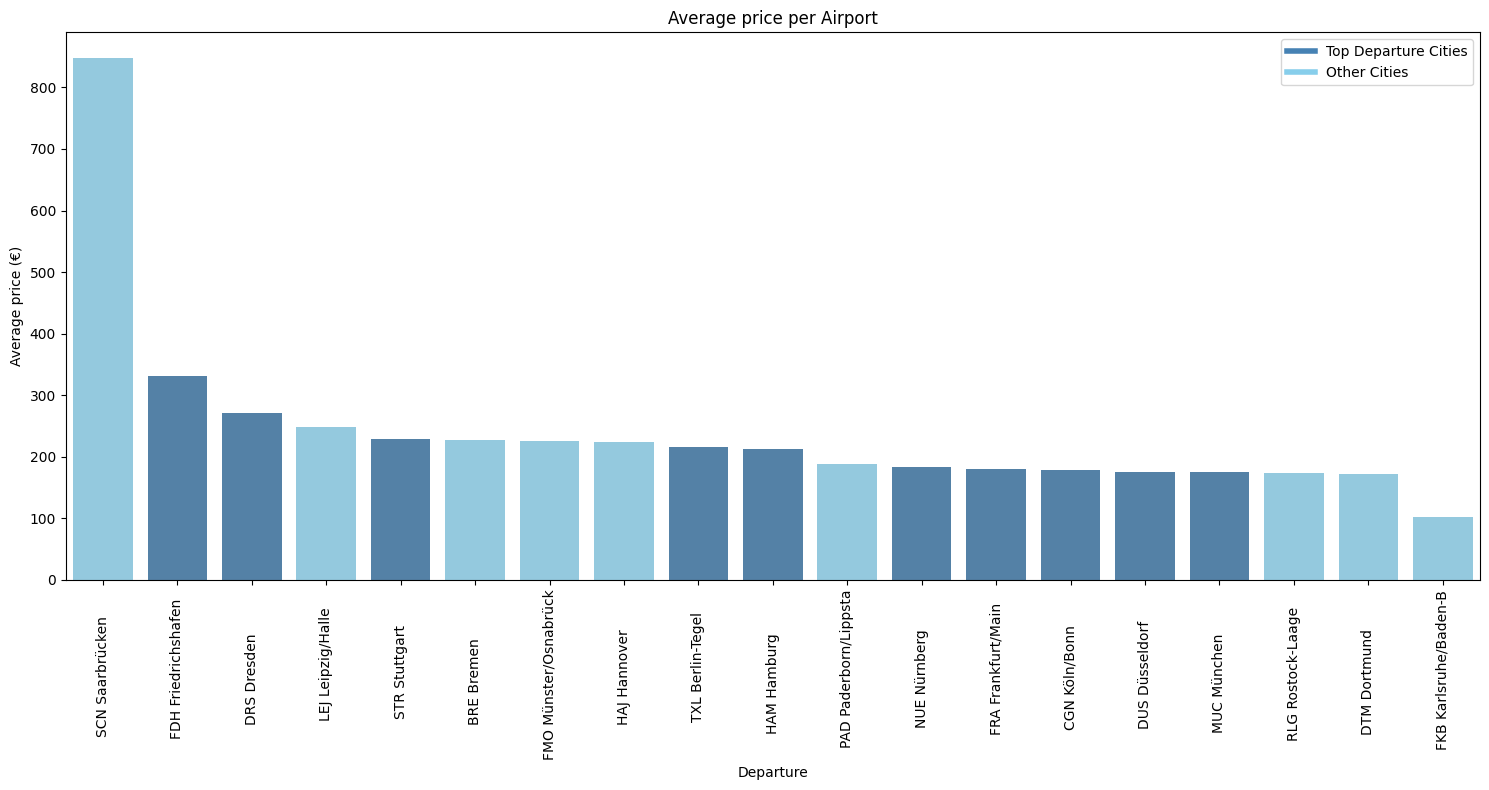

In [37]:
# Plotting the bar chart and highlighting the top 10 cities
plt.figure(figsize=(15,8))
bar_plot = sns.barplot(x=average_price_departure.index, 
                       y=average_price_departure.values, 
                       order=average_price_departure.index,
                       palette=['steelblue' if city in top_departure_cities else 'skyblue' for city in average_price_departure.index])

# Adding a legend for top_departure_cities
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='steelblue', lw=4, label='Top Departure Cities'),
                   Line2D([0], [0], color='skyblue', lw=4, label='Other Cities')]
bar_plot.legend(handles=legend_elements, loc='upper right')

plt.title('Average price per Airport')
plt.xlabel('Departure')
plt.ylabel('Average price (€)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* The highest average price is for flights departing from SCN Saarbrücken.
* The lowest average price is for flights departing from FKB Karlsruhe/Baden-Baden.
* The prices of the top 10 departure airports are evenly distributed.

## Price & Arrival Airport

In [38]:
# Calculating the average price for each arrival city
average_price_arrival = plane_data.groupby('arrival_city')['price (€)'].mean().round()

# Displaying the average price for each departure city
average_price_arrival = average_price_arrival.sort_values(ascending=False)
average_price_arrival

arrival_city
SCN Saarbrücken          881.0
FDH Friedrichshafen      335.0
DRS Dresden              269.0
FMO Münster/Osnabrück    247.0
LEJ Leipzig/Halle        245.0
STR Stuttgart            241.0
BRE Bremen               223.0
HAJ Hannover             211.0
PAD Paderborn/Lippsta    208.0
HAM Hamburg              207.0
TXL Berlin-Tegel         201.0
CGN Köln/Bonn            193.0
MUC München              191.0
NUE Nürnberg             185.0
DUS Düsseldorf           182.0
RLG Rostock-Laage        181.0
DTM Dortmund             177.0
FRA Frankfurt/Main       169.0
FKB Karlsruhe/Baden-B     96.0
Name: price (€), dtype: float64

C:\Users\ayush\AppData\Local\Temp\ipykernel_27880\3260232091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=average_price_arrival.index,


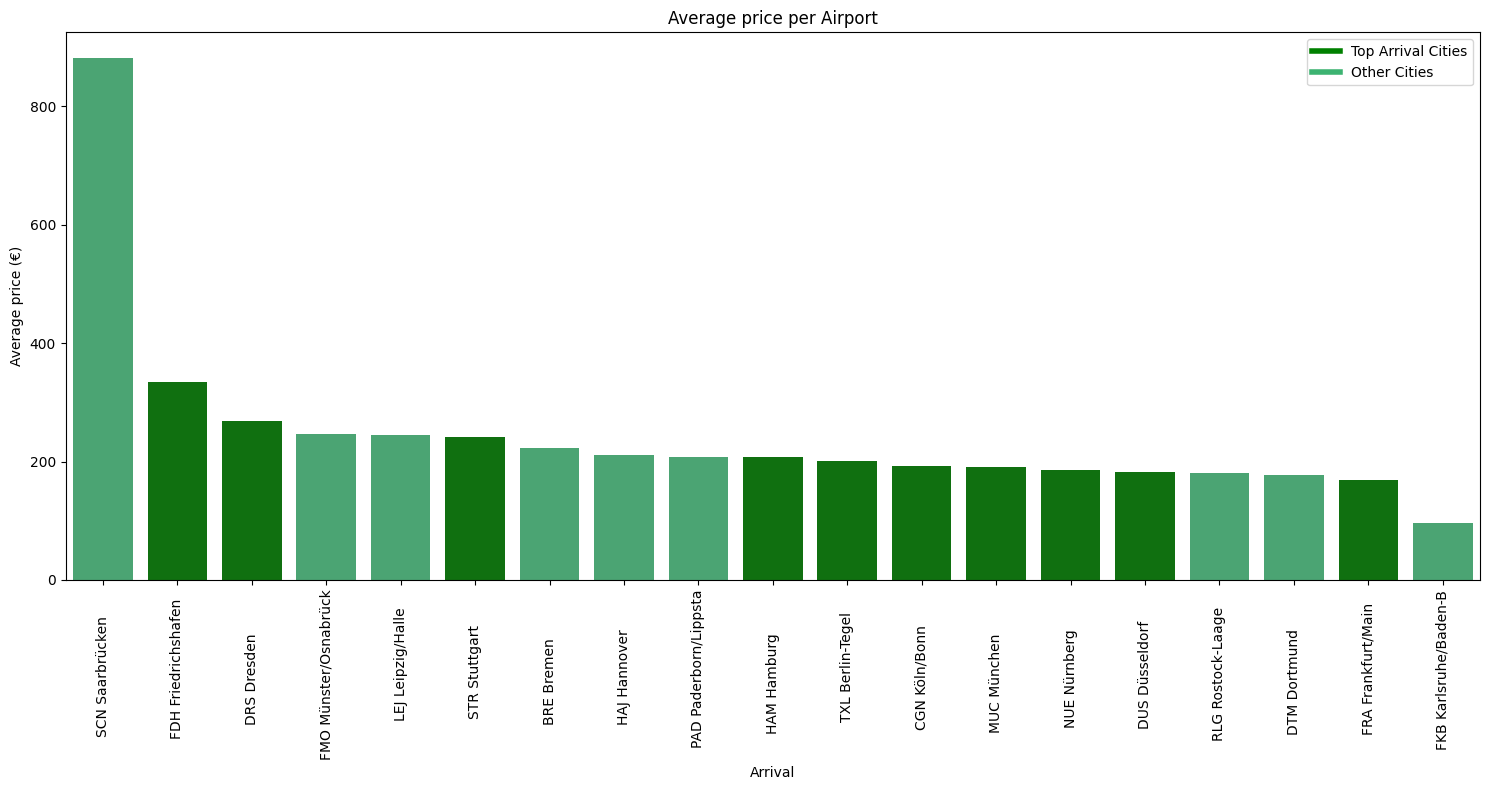

In [39]:
# Plotting the bar chart and highlighting the top 5 cities
plt.figure(figsize=(15,8))
bar_plot = sns.barplot(x=average_price_arrival.index, 
                       y=average_price_arrival.values, 
                       order=average_price_arrival.index,
                       palette=['green' if city in top_departure_cities else 'mediumseagreen' for city in average_price_arrival.index])

# Adding a legend for top_departure_cities
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='green', lw=4, label='Top Arrival Cities'),
                   Line2D([0], [0], color='mediumseagreen', lw=4, label='Other Cities')]
bar_plot.legend(handles=legend_elements, loc='upper right')

plt.title('Average price per Airport')
plt.xlabel('Arrival')
plt.ylabel('Average price (€)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* SCN Saarbrücken has notably higher prices for both departures and arrivals compared to other cities.
* For most cities, the average departure and arrival prices are closely aligned.

## Price & Booking Period

In [40]:
plane_data['booking_period_in_days'].unique()

array([  7,  14,  30,  90,  42, 180], dtype=int64)

In [41]:
# Calculating the average price for each booking period
average_price_per_booking_period = plane_data.groupby('booking_period_in_days')['price (€)'].mean().round()

# Displaying the average price for each booking period
print(average_price_per_booking_period)

booking_period_in_days
7      260.0
14     219.0
30     202.0
42     192.0
90     170.0
180    245.0
Name: price (€), dtype: float64


C:\Users\ayush\AppData\Local\Temp\ipykernel_27880\3408426015.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


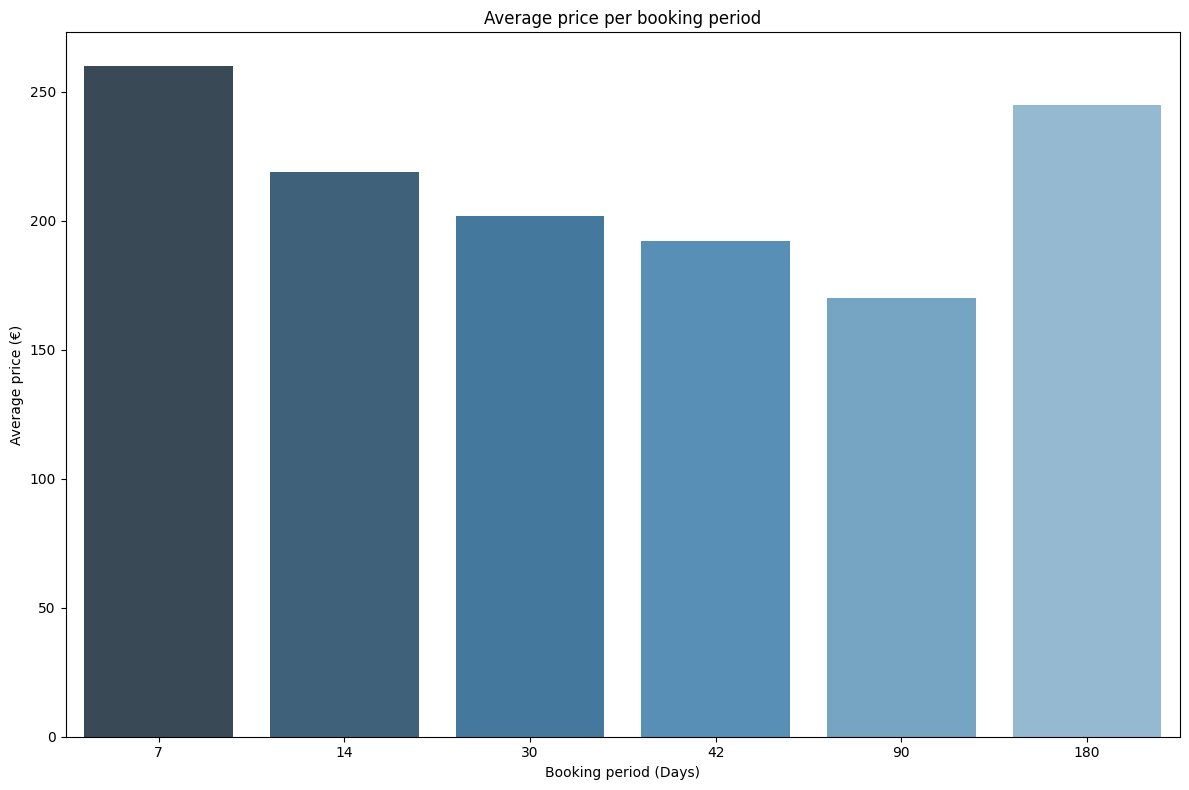

In [42]:
# Plotting the bar chart for the average price per booking period
plt.figure(figsize=(12,8))
sns.barplot(
    x=average_price_per_booking_period.index, 
    y=average_price_per_booking_period.values, 
    palette='Blues_r_d')

plt.title('Average price per booking period')
plt.xlabel('Booking period (Days)')
plt.ylabel('Average price (€)')
plt.tight_layout()
plt.show()

* **Short Notice Booking:** 
Booking just a week (7 days) in advance is the most expensive on average.
* **Long-Term Booking:** Surprisingly, booking 6 months (180 days) in advance is more expensive than booking 3 months in advance.
* **Optimal Booking Window:** Booking approximately 3 months (90 days) in advance offers the best price.
* **Intermediate Booking**: Booking 2 weeks to 6 weeks in advance offers prices that are lower than last-minute bookings but still higher than the optimal 3-month window.

## Prices and Stops

In [43]:
# Calculating the average price for each stops
average_price_per_stop = plane_data.groupby('stops')['price (€)'].mean().round()

# Displaying the average price for each stops
print(average_price_per_stop)

stops
0    131.0
1    270.0
2    431.0
Name: price (€), dtype: float64


C:\Users\ayush\AppData\Local\Temp\ipykernel_27880\2143598179.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


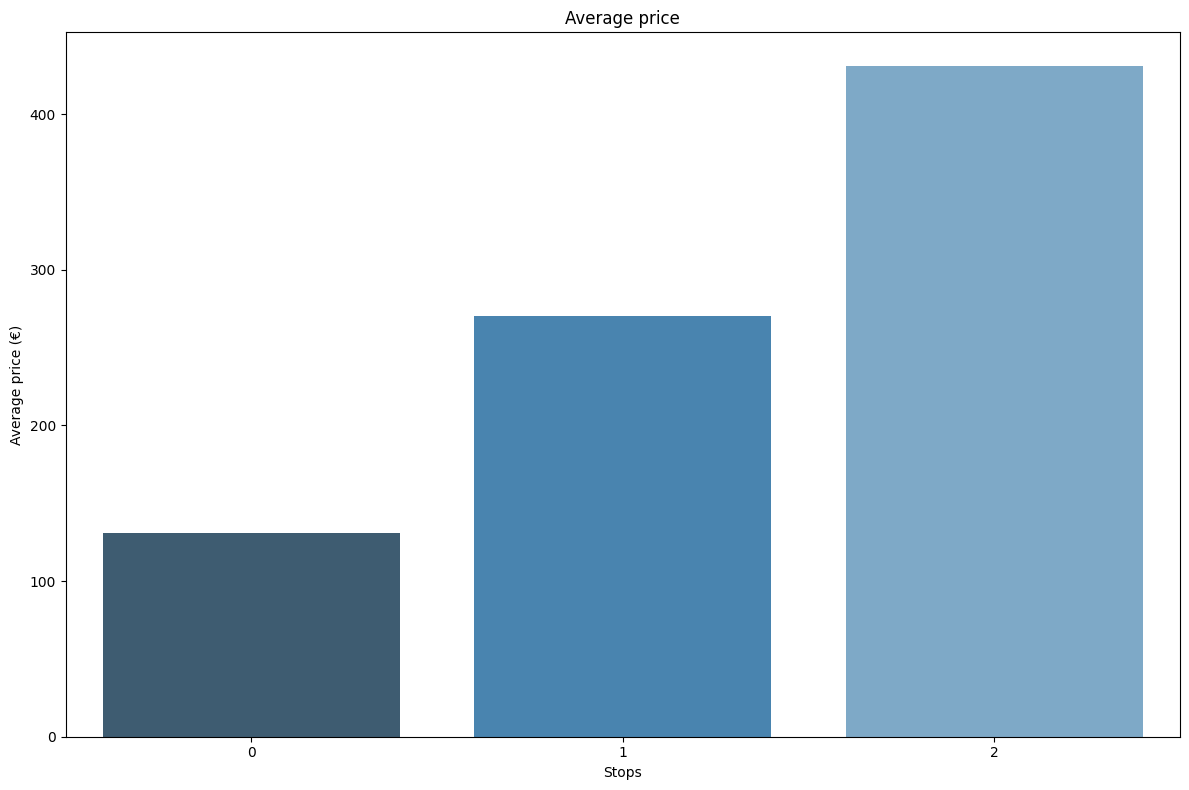

In [44]:
# Plotting the bar chart for the average price per stop
plt.figure(figsize=(12,8))
sns.barplot(
    x=average_price_per_stop.index, 
    y=average_price_per_stop.values, 
    palette='Blues_r_d')

plt.title('Average price')
plt.xlabel('Stops')
plt.ylabel('Average price (€)')
plt.tight_layout()
plt.show()

* Direct flights are the cheapest. 
* The price increases with the number of stops.

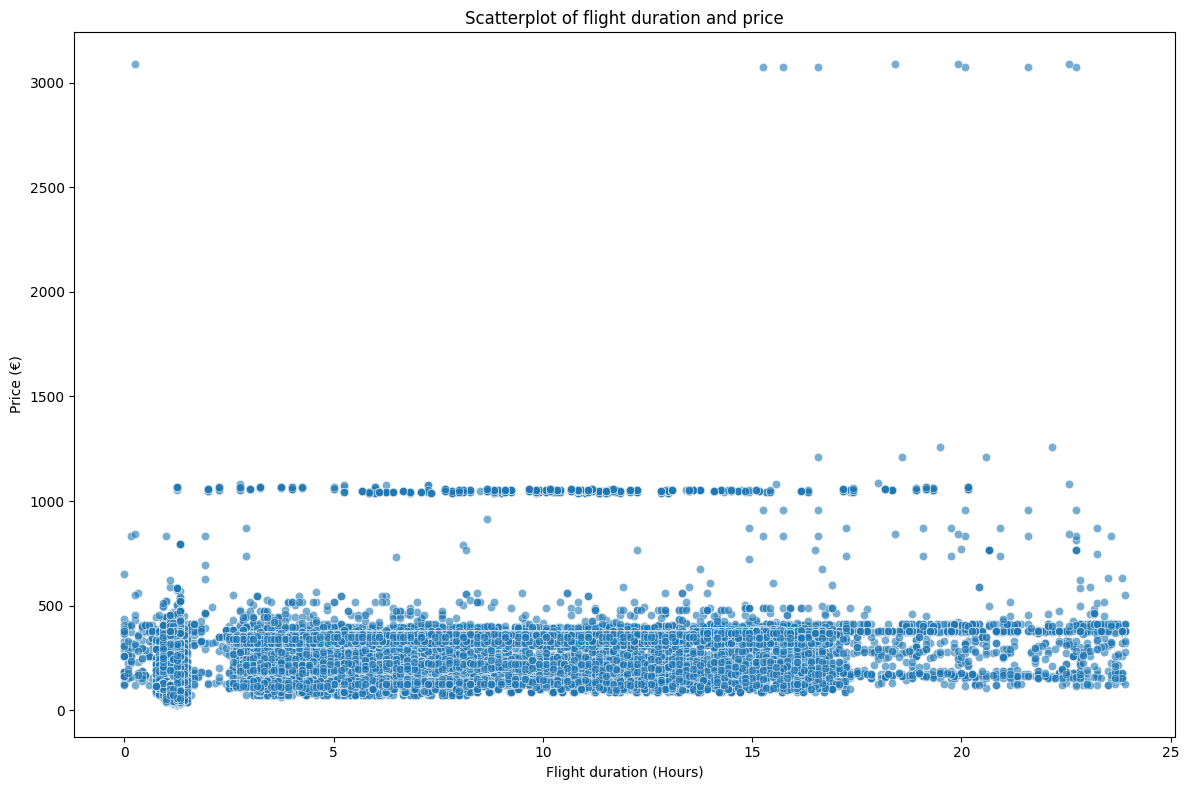

In [45]:
# Plotting the scatter plot
plt.figure(figsize=(12,8))
sns.scatterplot(x='flight_duration', y='price (€)', data=plane_data, alpha=0.6)
plt.title('Scatterplot of flight duration and price')
plt.xlabel('Flight duration (Hours)')
plt.ylabel('Price (€)')
plt.tight_layout()
plt.show()

* There's a cluster of points at the lower end of the duration scale, indicating many short flights. 
* This cluster has a wide range of prices, suggesting that factors other than duration influence the price for shorter flights.
* There's no apparent strong linear relationship between flight duration and price, meaning that longer flights are not necessarily more expensive.

# Routes

In [46]:
# Creating a new column 'route'
plane_data['route'] = plane_data['departure_city'].str[:3] + ' - ' + plane_data['arrival_city'].str[:3]

In [47]:
# Route counts in % 
route_counts = pd.DataFrame(plane_data['route'].value_counts(normalize=True))
route_counts.head(10)

,proportion
route,
TXL - NUE,0.047408
NUE - TXL,0.044151
FDH - TXL,0.028582
TXL - FDH,0.028087
TXL - CGN,0.025325
CGN - TXL,0.024319
DUS - TXL,0.024207
TXL - FKB,0.022083
TXL - DUS,0.021860


In [48]:
route_counts

,proportion
route,
TXL - NUE,0.047408
NUE - TXL,0.044151
FDH - TXL,0.028582
TXL - FDH,0.028087
TXL - CGN,0.025325
...,...
FDH - DUS,0.002379
HAM - SCN,0.002012
SCN - HAM,0.001948


In [49]:
from re import search

df = route_counts

for ind in df.index: 
    if search('TXL', ind): 
        print(ind) 

TXL - NUE
NUE - TXL
FDH - TXL
TXL - FDH
TXL - CGN
CGN - TXL
DUS - TXL
TXL - FKB
TXL - DUS
TXL - STR
FKB - TXL
STR - TXL
TXL - MUC
MUC - TXL
FRA - TXL
TXL - FRA
TXL - SCN
SCN - TXL


*  The route between Berlin-Tegel (TXL) and Nürnberg (NUE) is the most frequent, with both directions (TXL to NUE and NUE to TXL) taking the top two spots.
* The differences between the percentages of these top routes are not vast, suggesting a relatively even distribution of flights among the top routes.

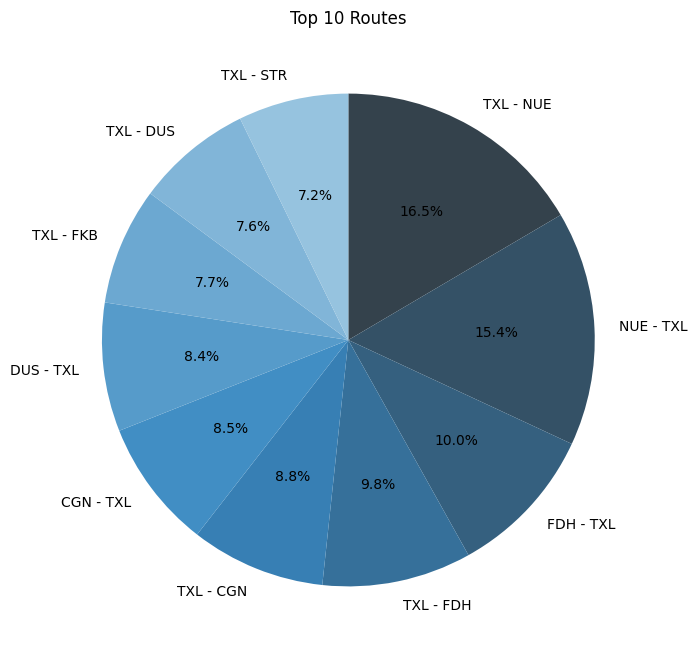

In [50]:
# Top 10 routes
top_10_routes = plane_data['route'].value_counts().head(10)

plt.figure(figsize=(12, 8))
plt.pie(top_10_routes.values, 
        labels=top_10_routes.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('Blues_r_d', len(top_10_routes)), 
        counterclock=False,
)

plt.title('Top 10 Routes')
plt.show()

In [51]:
# Average price of Top 10 Routes 
average_price_top_10_routes = plane_data.groupby('route')['price (€)'].mean().loc[top_10_routes.index].round(2)
average_price_top_10_routes

route
TXL - NUE    162.72
NUE - TXL    159.89
FDH - TXL    341.01
TXL - FDH    345.33
TXL - CGN    156.40
CGN - TXL    130.04
DUS - TXL    111.01
TXL - FKB     95.69
TXL - DUS    102.22
TXL - STR    199.78
Name: price (€), dtype: float64

C:\Users\ayush\AppData\Local\Temp\ipykernel_27880\103001443.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_top_10_routes.index, y=average_price_top_10_routes.values, palette='Blues_r_d')


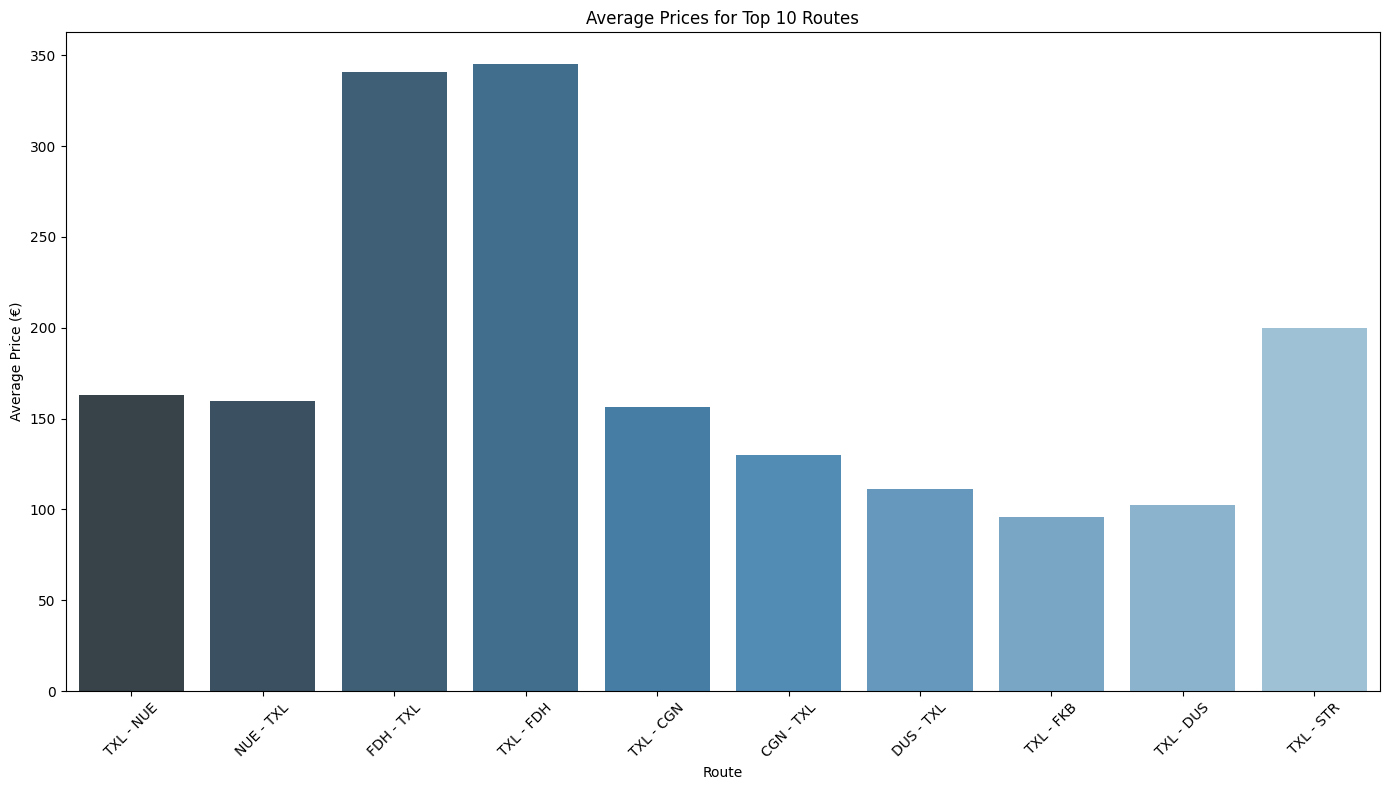

In [52]:
# Plotting a bar chart for the average prices of the top 10 routes
plt.figure(figsize=(14, 8))
sns.barplot(x=average_price_top_10_routes.index, y=average_price_top_10_routes.values, palette='Blues_r_d')

plt.title('Average Prices for Top 10 Routes')
plt.xlabel('Route')
plt.ylabel('Average Price (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* FDH - TXL and TXL - FDH are noticeably more expensive compared to others
* TXL - FKB and TXL - DUS are among the more affordable options.

In [53]:
flight_routes = plane_data['route'].unique()
flight_routes

array(['TXL - DUS', 'TXL - FRA', 'TXL - FDH', 'TXL - FKB', 'TXL - CGN',
       'TXL - MUC', 'TXL - NUE', 'TXL - SCN', 'TXL - STR', 'BRE - FRA',
       'BRE - MUC', 'BRE - STR', 'DTM - MUC', 'DRS - DUS', 'DRS - FRA',
       'DRS - CGN', 'DRS - MUC', 'DRS - STR', 'DUS - TXL', 'DUS - DRS',
       'DUS - FRA', 'DUS - HAM', 'DUS - LEJ', 'DUS - MUC', 'DUS - NUE',
       'DUS - STR', 'FRA - TXL', 'FRA - BRE', 'FRA - DRS', 'FRA - FDH',
       'FRA - HAM', 'FRA - HAJ', 'FRA - LEJ', 'FRA - MUC', 'FDH - TXL',
       'FDH - FRA', 'FDH - HAM', 'HAM - DUS', 'HAM - FRA', 'HAM - FDH',
       'HAM - CGN', 'HAM - MUC', 'HAM - NUE', 'HAM - SCN', 'HAM - STR',
       'HAJ - FRA', 'HAJ - MUC', 'HAJ - STR', 'FKB - TXL', 'CGN - TXL',
       'CGN - DRS', 'CGN - HAM', 'CGN - LEJ', 'CGN - MUC', 'LEJ - DUS',
       'LEJ - FRA', 'LEJ - CGN', 'LEJ - MUC', 'LEJ - STR', 'MUC - TXL',
       'MUC - BRE', 'MUC - DRS', 'MUC - DUS', 'MUC - FRA', 'MUC - HAM',
       'MUC - HAJ', 'MUC - CGN', 'MUC - LEJ', 'MUC - FMO', 'MUC 

In [54]:
# Counting the routes of each airport
airport_routes_count = [route.split(' - ')[0] for route in flight_routes]
airport_routes_count = pd.Series(airport_routes_count).value_counts()
airport_routes_count

MUC    13
TXL     9
DUS     9
FRA     8
HAM     8
STR     7
DRS     5
CGN     5
LEJ     5
FDH     4
HAJ     3
BRE     3
NUE     3
FMO     2
SCN     2
DTM     1
PAD     1
RLG     1
FKB     1
Name: count, dtype: int64

* Although TXL has the most flights, MUC is the airport with the most routes.

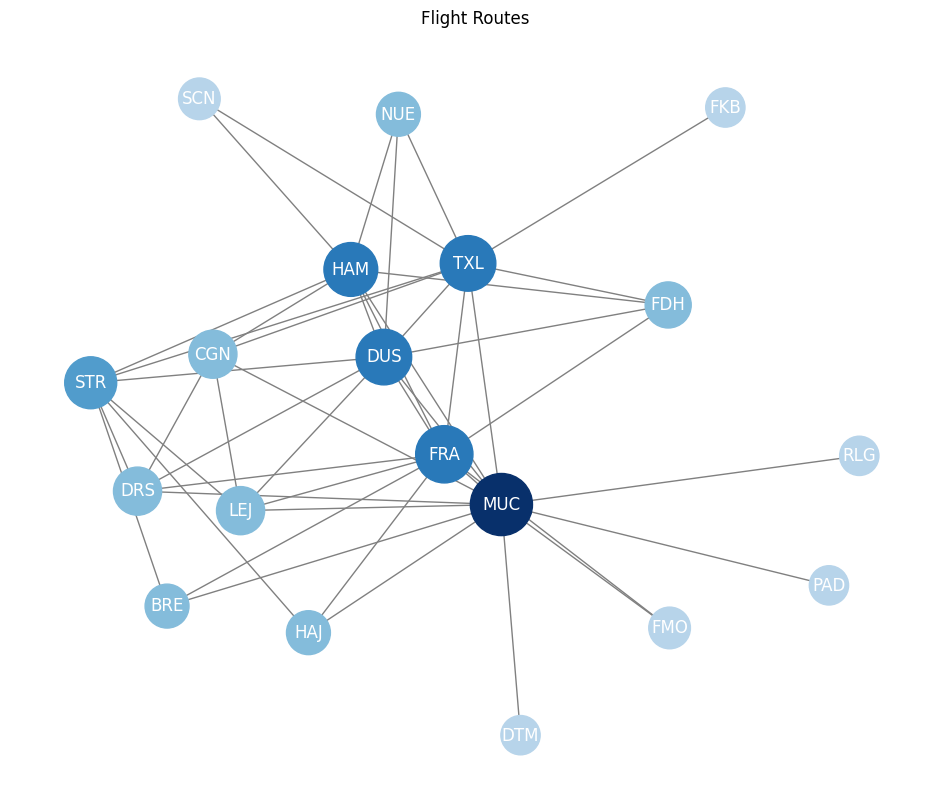

In [55]:
# Graph from 'route'
G = nx.Graph()

for route in plane_data['route']:
    source, destination = route.split(' - ')
    G.add_edge(source, destination)

# Node positioning 
kamada_kawai_pos = nx.kamada_kawai_layout(G)

# Node sizes
degree = dict(G.degree())
node_colors = [v for v in degree.values()]
min_node_size = 800
node_sizes = [min_node_size + (v - min(node_colors)) * 100 for v in node_colors]


# Colors
bins = np.linspace(0, max(node_colors), 6)
node_colors_discrete = np.digitize(node_colors, bins) - 1  # Subtract 1 to make the bins 0-indexed

colors = plt.cm.Blues(np.linspace(0.3, 1, 256))  # Starts at 0.3 to get a darker light blue
custom_blues_cmap = plt.cm.colors.ListedColormap(colors)

# Node diagram 
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, kamada_kawai_pos, 
                       node_size=node_sizes, 
                       node_color=node_colors_discrete, 
                       cmap=custom_blues_cmap, 
                       vmax=5)
nx.draw_networkx_edges(G, kamada_kawai_pos, edge_color='gray')
nx.draw_networkx_labels(G, kamada_kawai_pos, font_size=12, font_color='white')
plt.title('Flight Routes')
plt.axis('off')
plt.show()

* Each node in the graph represents an airport, and the size of the node indicates its connectivity (larger nodes are more connected).
* Edges between nodes signify the existence of a route between two airports.
* The color intensity of the nodes represents the number of connections, with darker nodes having more connections.

C:\Users\ayush\AppData\Local\Temp\ipykernel_27880\3123716065.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=airport_routes_count.index, x=airport_routes_count.values, palette=color_palette)


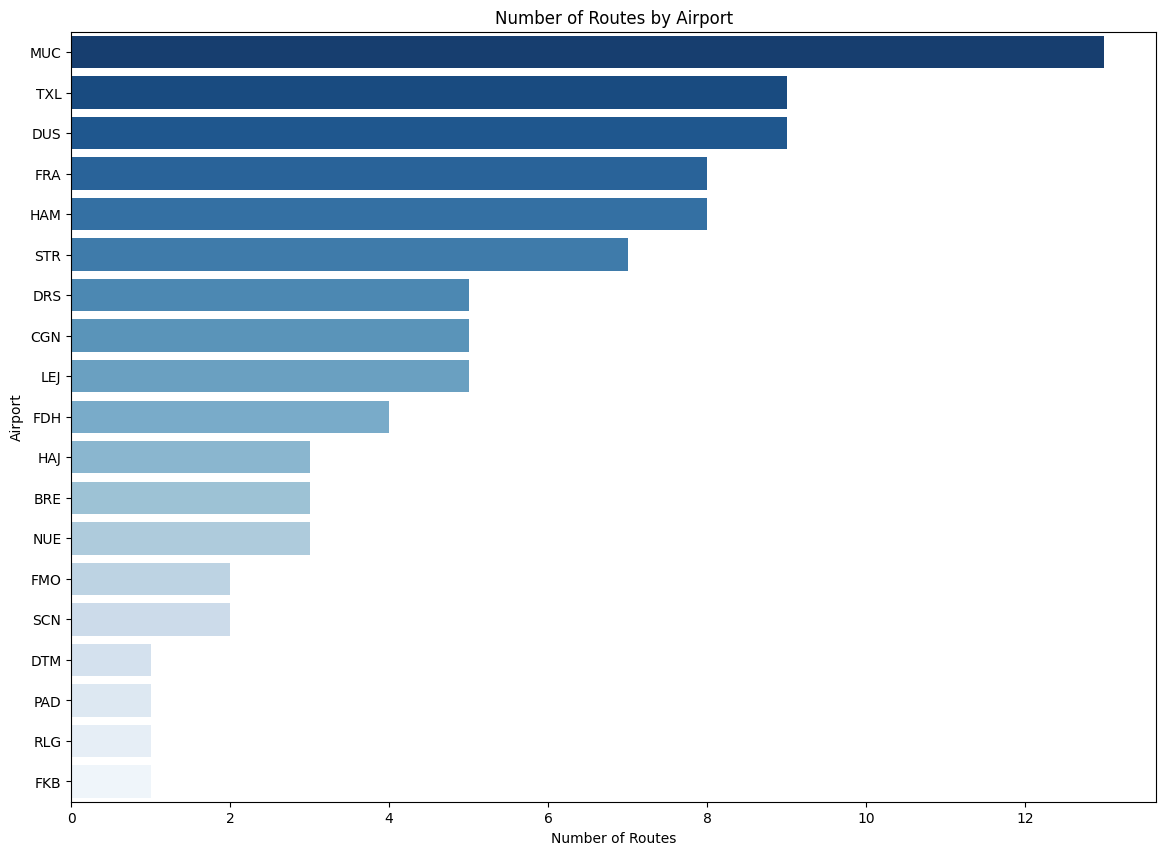

In [56]:
# Set the color palette as per the user's request
color_palette = sns.color_palette('Blues_r', len(airport_routes_count))

# Plotting the bar chart
plt.figure(figsize=(14,10))
sns.barplot(y=airport_routes_count.index, x=airport_routes_count.values, palette=color_palette)
plt.title('Number of Routes by Airport')
plt.xlabel('Number of Routes')
plt.ylabel('Airport')
plt.show()

# Airlines

In [57]:
# Count the number of flights for each airline
airline_counts = plane_data['airline'].value_counts()
airline_counts

airline
Lufthansa                        45912
Eurowings                        12289
easyJet                           2935
KLM                                341
Luxair                             290
British Airways                    197
Air France                         194
Multiple Airlines                  153
Swiss International Air Lines      140
Mehrere Fluglinien                  69
Austrian Airlines                   56
LOT-Polish Airlines                 44
Flybe                                3
SAS                                  2
Alitalia                             1
Name: count, dtype: int64

In [58]:
# Calculate the percentage for each airline
airline_percentage = (airline_counts / airline_counts.sum()) * 100

# Combine the counts and percentages for a comprehensive view
airline_summary = pd.DataFrame({
    'Counts': airline_counts,
    'Percentage (%)': airline_percentage
})
airline_summary

,Counts,Percentage (%)
airline,,
Lufthansa,45912,73.311404
Eurowings,12289,19.622840
easyJet,2935,4.686552
KLM,341,0.544502
Luxair,290,0.463066
British Airways,197,0.314566
Air France,194,0.309775
Multiple Airlines,153,0.244307
Swiss International Air Lines,140,0.223549


* Lufthansa dominates the dataset with the highest number of flights, significantly more than the other airlines.
* Eurowings and easyJet follow as the next major carriers, but with significantly fewer flights compared to Lufthansa.
* Some airlines, such as Flybe, SAS, and Alitalia, have very few flights represented in this dataset.

In [59]:
# Avarage Price per Airline 
average_prices_by_airline = plane_data.groupby('airline')['price (€)'].mean().reset_index()
average_prices_by_airline = average_prices_by_airline.sort_values(by='price (€)', ascending=False)
average_prices_by_airline

,airline,price (€)
10,Mehrere Fluglinien,1200.826087
12,SAS,510.000000
2,Austrian Airlines,431.232143
7,LOT-Polish Airlines,361.840909
13,Swiss International Air Lines,303.785714
11,Multiple Airlines,293.411765
3,British Airways,289.375635
9,Luxair,277.475862
8,Lufthansa,251.604069
0,Air France,227.587629


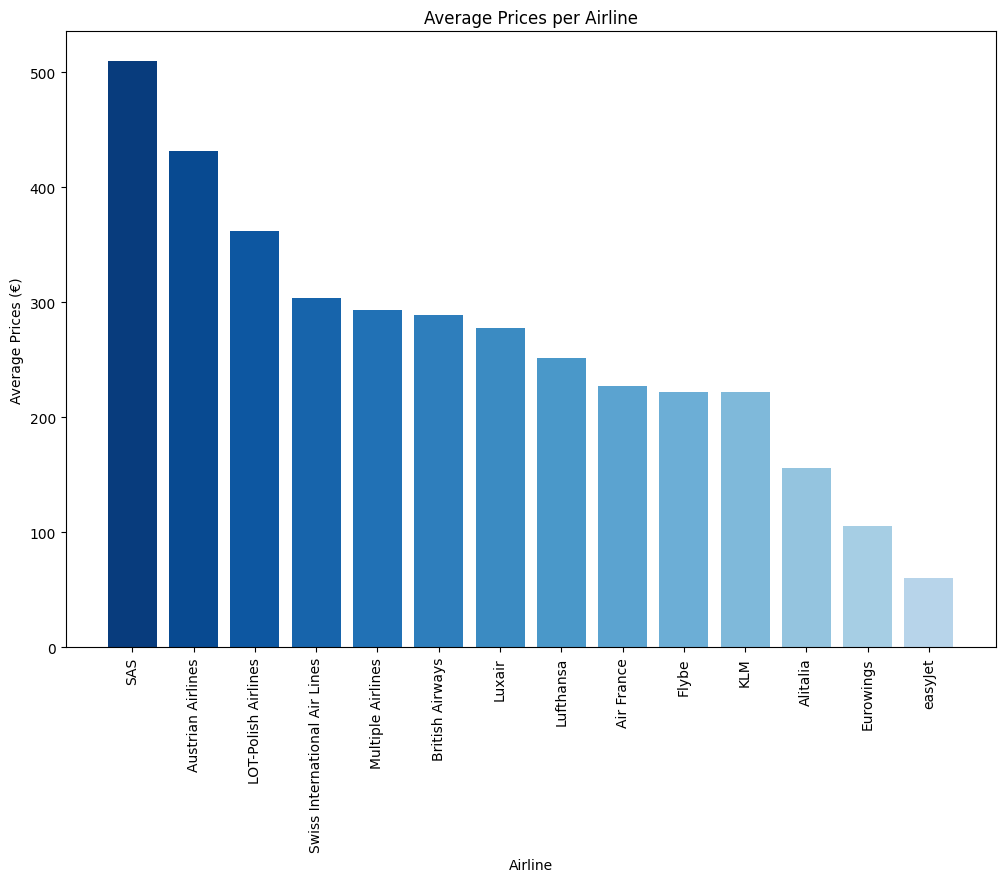

In [60]:
# Bar Char of Average Prices per Airline
plt.figure(figsize=(12, 8))
plt.bar(average_prices_by_airline.iloc[1:]['airline'], average_prices_by_airline.iloc[1:]['price (€)'], color= color_palette)
plt.xlabel('Airline')
plt.ylabel('Average Prices (€)')
plt.title('Average Prices per Airline')
plt.xticks(rotation=90)  
plt.show()

* Flying with multiple airlines has the highest average ticket price.
* easyJet offers the lowest average price, which aligns with its positioning as a budget airline.
* Eurowings, another budget airline, also has a relatively low average price.
* raditional carriers like Lufthansa, British Airways, and Air France have prices in the mid-range, reflecting their broader service offerings and possible route complexities.

# Overall Insights:

The dataset provides a snapshot of domestic air travel in Germany. Berlin-Tegel stands out as a central hub, and traditional carriers like Lufthansa dominate in terms of flight volume. However, ticket pricing dynamics vary widely across airlines, routes, and booking periods. Passengers might find better deals by booking well in advance, and budget airlines like easyJet offer competitive prices, especially for the most popular routes.

In [61]:
plane_data = plane_data.rename(columns={"price (€)":"price"})

plane_data

,departure_city,arrival_city,scrape_date,departure_date,booking_period_in_days,departure_time,arrival_time,airline,stops,price,departure_time_24h,arrival_time_24h,flight_duration,weekday,departure_hour,route
0,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,7,6:30am,7:45am,Eurowings,0,74.0,06:30,07:45,1.250000,Friday,6,TXL - DUS
1,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,7,6:40am,7:55am,easyJet,0,75.0,06:40,07:55,1.250000,Friday,6,TXL - DUS
2,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,7,6:45am,8:00am,easyJet,0,80.0,06:45,08:00,1.250000,Friday,6,TXL - DUS
3,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,7,6:15am,7:30am,Eurowings,0,84.0,06:15,07:30,1.250000,Friday,6,TXL - DUS
4,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,2019-10-25,7,6:55am,8:10am,Eurowings,0,84.0,06:55,08:10,1.250000,Friday,6,TXL - DUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62621,STR Stuttgart,HAJ Hannover,2019-10-24,2020-04-24,180,15:05 Uhr,16:05 Uhr,Eurowings,0,52.0,15:05,16:05,1.000000,Friday,15,STR - HAJ
62622,STR Stuttgart,HAJ Hannover,2019-10-24,2020-04-24,180,10:30 Uhr,11:40 Uhr,Eurowings,0,102.0,10:30,11:40,1.166667,Friday,10,STR - HAJ
62623,STR Stuttgart,HAJ Hannover,2019-10-24,2020-04-24,180,07:00 Uhr,08:05 Uhr,Eurowings,0,192.0,07:00,08:05,1.083333,Friday,7,STR - HAJ
62624,STR Stuttgart,LEJ Leipzig/Halle,2019-10-24,2020-04-24,180,15:05 Uhr,16:10 Uhr,Eurowings,0,72.0,15:05,16:10,1.083333,Friday,15,STR - LEJ


# PREDICTING USING ML MODELS

All the visualizations we did have shown a specific correlation between fields duration, route, arrival & departure times, airlines & booking period.
Our ML models can use these features to obtain a precise prediction

In [62]:
#Importing neccessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [63]:
# Drop unnecessary columns
plane_data = plane_data.drop(['departure_time', 'arrival_time'], axis=1)

In [64]:

# Split data into features (X) and target variable (y)
X = plane_data.drop('price', axis=1)
y = plane_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
df = plane_data

# Convert 'scrape date' and 'departure date' to datetime format
df['scrape_date'] = pd.to_datetime(df['scrape_date'])
df['departure_date'] = pd.to_datetime(df['departure_date'])

# Extract relevant datetime features
df['scrape day'] = df['scrape_date'].dt.day
df['departure day'] = df['departure_date'].dt.day

# Drop the original datetime columns
df = df.drop(['scrape_date', 'departure_date'], axis=1)

# Extract hour and minute from 'departure time' and 'arrival time'
df['departure hour'] = pd.to_datetime(df['departure_time_24h'], format='%H:%M').dt.hour
df['departure minute'] = pd.to_datetime(df['departure_time_24h'], format='%H:%M').dt.minute
df['arrival hour'] = pd.to_datetime(df['arrival_time_24h'], format='%H:%M').dt.hour
df['arrival minute'] = pd.to_datetime(df['arrival_time_24h'], format='%H:%M').dt.minute

# Drop the original datetime columns
df = df.drop(['departure_time_24h'], axis=1)
df = df.drop(['arrival_time_24h'], axis=1)

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['departure_city', 'arrival_city', 'airline', 'weekday', 'route'], drop_first=True)

# Split data into features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [66]:
# Create SVM model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluate the model
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)

print(f'SVM Mean Squared Error: {svm_mse}')
print(f'SVM R-squared: {svm_r2}')

SVM Mean Squared Error: 6756.027448479096
SVM R-squared: 0.7801073976051428


In [67]:
# Create Linear Regression model
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train)

# Predict on the test set
regression_predictions = regression_model.predict(X_test_scaled)

# Evaluate the model
regression_mse = mean_squared_error(y_test, regression_predictions)
regression_r2 = r2_score(y_test, regression_predictions)

print(f'Regression Mean Squared Error: {regression_mse}')
print(f'Regression R-squared: {regression_r2}')

Regression Mean Squared Error: 6036.222328025374
Regression R-squared: 0.8035353398923436


In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Convert regression predictions to binary classification labels (e.g., high/low price)
threshold = 200  # Set an appropriate threshold based on your problem
y_pred_class_svm = (svm_predictions > threshold).astype(int)
y_pred_class_regression = (regression_predictions > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Classification report for SVM model
print("SVM Classification Report:")
print(classification_report(y_test_class, y_pred_class_svm))

# Classification report for Regression model
print("Regression Classification Report:")
print(classification_report(y_test_class, y_pred_class_regression))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      7191
           1       0.81      0.77      0.79      5335

    accuracy                           0.83     12526
   macro avg       0.83      0.82      0.82     12526
weighted avg       0.83      0.83      0.83     12526

Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7191
           1       0.79      0.81      0.80      5335

    accuracy                           0.83     12526
   macro avg       0.82      0.83      0.83     12526
weighted avg       0.83      0.83      0.83     12526

